# Market Index Portfolio

## Invest in the Markets of Economy 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from tabulate import tabulate
from scipy.stats import norm
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['^GSPC','^DJI','^IXIC','^RUT']
start = '2007-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbols,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  4 of 4 downloaded


,^DJI,^GSPC,^IXIC,^RUT
Date,,,,
2007-01-03,12474.519531,1416.599976,2423.159912,787.419983
2007-01-04,12480.690430,1418.339966,2453.429932,789.950012
2007-01-05,12398.009766,1409.709961,2434.250000,775.869995
2007-01-08,12423.490234,1412.839966,2438.199951,776.989990
2007-01-09,12416.599609,1412.109985,2443.830078,778.330017


In [3]:
df.tail()

,^DJI,^GSPC,^IXIC,^RUT
Date,,,,
2018-12-24,21792.199219,2351.100098,6192.919922,1266.920044
2018-12-26,22878.449219,2467.699951,6554.359863,1329.810059
2018-12-27,23138.820313,2488.830078,6579.490234,1331.819946
2018-12-28,23062.400391,2485.739990,6584.520020,1337.920044
2018-12-31,23327.460938,2506.850098,6635.279785,1348.560059


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
12 years


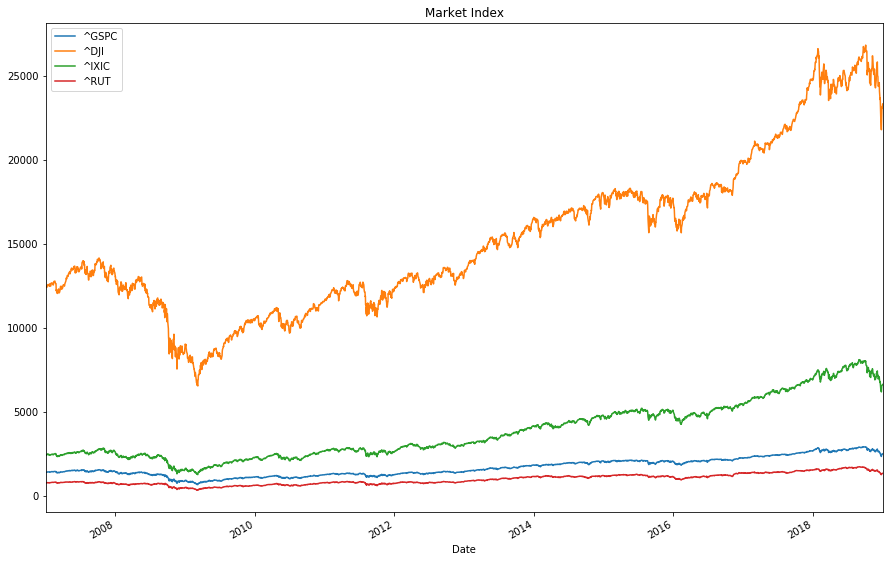

In [5]:
for s in symbols: 
    df[s].plot(label = s, figsize = (15,10))
plt.title('Market Index')
plt.legend()

In [6]:
for s in symbols:
    print(s + ":",  df[s].max())

^GSPC: 2930.75
^DJI: 26828.390625
^IXIC: 8109.689941
^RUT: 1740.75


In [7]:
for s in symbols:
    print(s + ":",  df[s].min())

^GSPC: 676.530029
^DJI: 6547.049805
^IXIC: 1268.640015
^RUT: 343.26001


In [8]:
returns = pd.DataFrame()
for s in symbols: 
    returns[s + " Return"] = (np.log(1 + df[s].pct_change())).dropna()
    
returns.head(4)

,^GSPC Return,^DJI Return,^IXIC Return,^RUT Return
Date,,,,
2007-01-04,0.001228,0.000495,0.012415,0.003208
2007-01-05,-0.006103,-0.006647,-0.007848,-0.017985
2007-01-08,0.002218,0.002053,0.001621,0.001442
2007-01-09,-0.000517,-0.000555,0.002306,0.001723


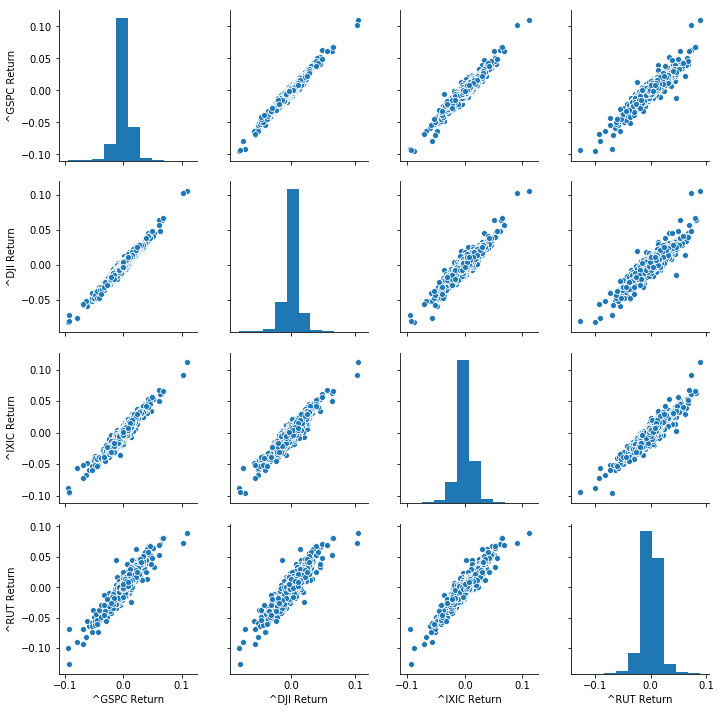

In [9]:
sns.pairplot(returns[1:])

In [10]:
# dates each bank stock had the best and worst single day returns. 
print('Best Day Returns')
print('-'*20)
print(returns.idxmax())
print('\n')
print('Worst Day Returns')
print('-'*20)
print(returns.idxmin())

Best Day Returns
--------------------
^GSPC Return   2008-10-13
^DJI Return    2008-10-13
^IXIC Return   2008-10-13
^RUT Return    2008-10-13
dtype: datetime64[ns]


Worst Day Returns
--------------------
^GSPC Return   2008-10-15
^DJI Return    2008-10-15
^IXIC Return   2008-09-29
^RUT Return    2008-12-01
dtype: datetime64[ns]


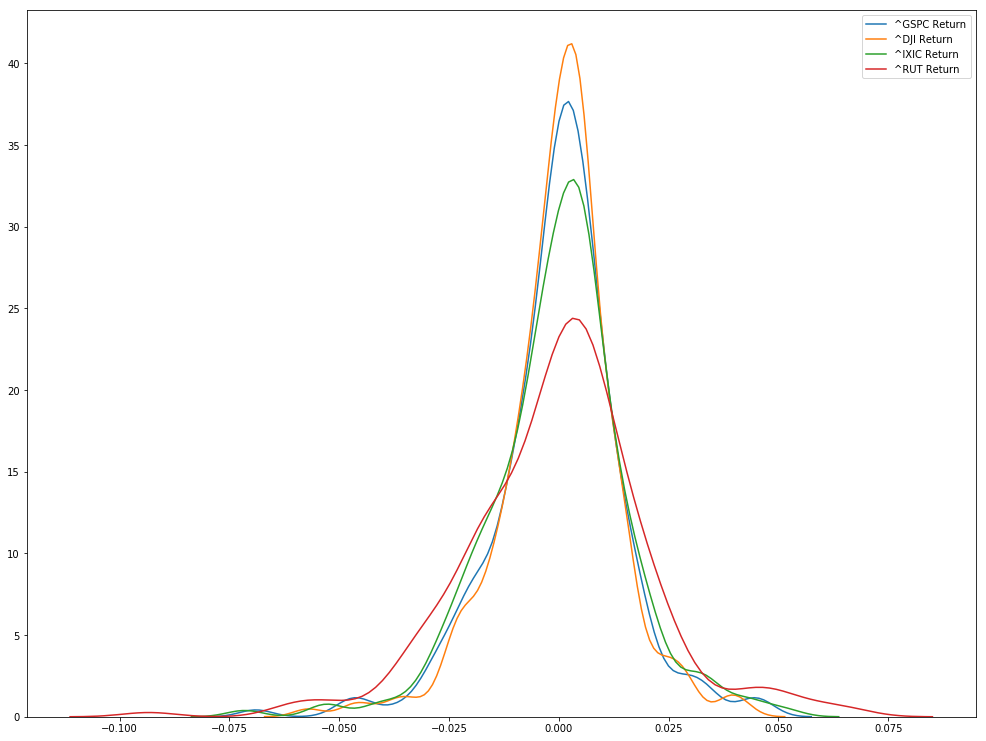

In [11]:
plt.figure(figsize=(17,13))

for r in returns:
    sns.kdeplot(returns.ix["2011-01-01" : "2011-12-31 "][r])

In [12]:
returns.corr()

,^GSPC Return,^DJI Return,^IXIC Return,^RUT Return
^GSPC Return,1.000000,0.981037,0.957363,0.921292
^DJI Return,0.981037,1.000000,0.921473,0.884198
^IXIC Return,0.957363,0.921473,1.000000,0.931116
^RUT Return,0.921292,0.884198,0.931116,1.000000


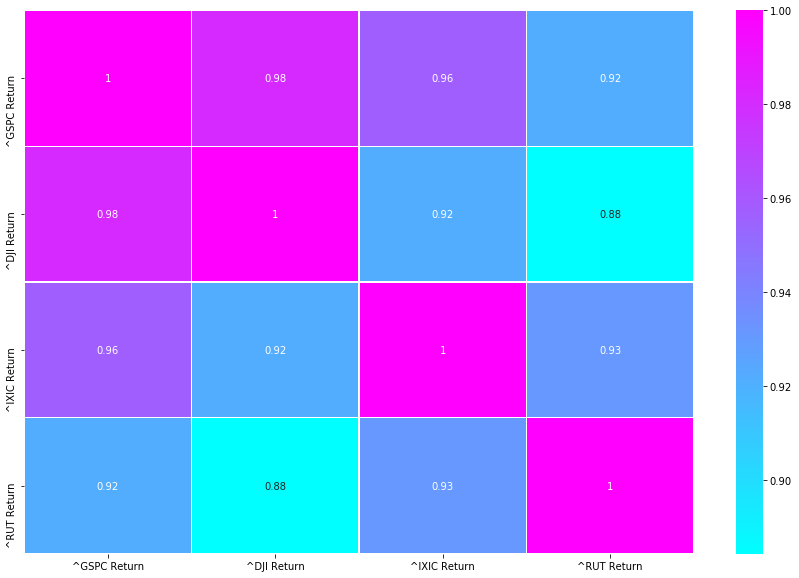

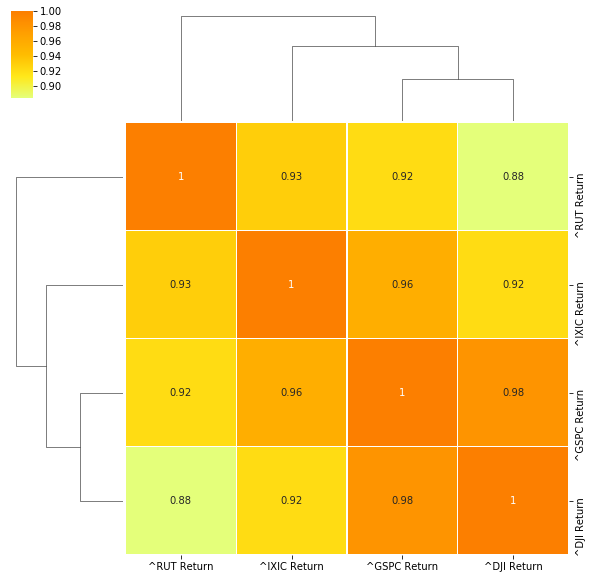

In [13]:
# Heatmap for return of all the banks
plt.figure(figsize=(15,10))
sns.heatmap(returns.corr(), cmap="cool",linewidths=.1, annot= True)

sns.clustermap(returns.corr(), cmap="Wistia",linewidths=.1, annot= True)

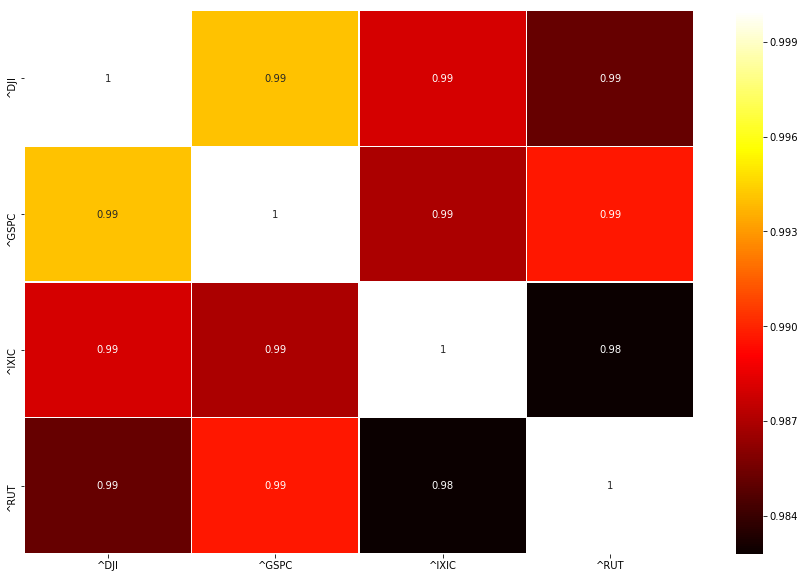

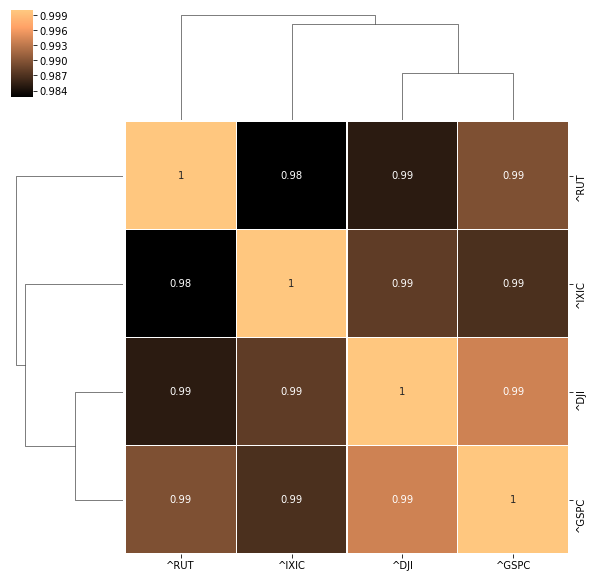

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap="hot",linewidths=.1, annot= True)

sns.clustermap(df.corr(), cmap="copper",linewidths=.1, annot= True)

In [15]:
Cash = 100000
print('Percentage of invest:')
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x in zip(df.columns, percent_invest):
    cost = x * Cash
    print('{}: {}'.format(i, cost))

Percentage of invest:
^DJI: 25000.0
^GSPC: 25000.0
^IXIC: 25000.0
^RUT: 25000.0


In [16]:
print('Number of Shares:')
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    print('{}: {}'.format(i, shares))

Number of Shares:
^DJI: 2
^GSPC: 17
^IXIC: 10
^RUT: 31


In [17]:
print('Beginning Value:')
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    Begin_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Begin_Value))

Beginning Value:
^DJI: $24949.04
^GSPC: $24082.2
^IXIC: $24231.6
^RUT: $24410.02


In [18]:
print('Current Value:')
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    print('{}: ${}'.format(i, Current_Value))

Current Value:
^DJI: $46654.92
^GSPC: $42616.45
^IXIC: $66352.8
^RUT: $41805.36


In [19]:
result = []
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    result.append(Current_Value)
print('Total Value: $%s' % round(sum(result),2))

Total Value: $197429.53


In [20]:
# Calculate Daily Returns
returns = df.pct_change()
returns = returns.dropna()

In [21]:
# Calculate mean returns
meanDailyReturns = returns.mean()
print(meanDailyReturns)

^DJI     0.000275
^GSPC    0.000267
^IXIC    0.000424
^RUT     0.000302
dtype: float64


In [22]:
# Calculate std returns
stdDailyReturns = returns.std()
print(stdDailyReturns)

^DJI     0.011592
^GSPC    0.012487
^IXIC    0.013446
^RUT     0.015714
dtype: float64


In [23]:
# Define weights for the portfolio
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [24]:
# Calculate the covariance matrix on daily returns
cov_matrix = (returns.cov())*250
print (cov_matrix)

           ^DJI     ^GSPC     ^IXIC      ^RUT
^DJI   0.033595  0.035503  0.035910  0.040216
^GSPC  0.035503  0.038981  0.040191  0.045147
^IXIC  0.035910  0.040191  0.045201  0.049157
^RUT   0.040216  0.045147  0.049157  0.061729


In [25]:
# Calculate expected portfolio performance
portReturn = np.sum(meanDailyReturns*weights)

In [26]:
# Print the portfolio return
print(portReturn)

0.000316967142224249


In [27]:
# Create portfolio returns column
returns['Portfolio'] = returns.dot(weights)

In [28]:
returns.head()

,^DJI,^GSPC,^IXIC,^RUT,Portfolio
Date,,,,,
2007-01-04,0.000495,0.001228,0.012492,0.003213,0.004357
2007-01-05,-0.006625,-0.006085,-0.007818,-0.017824,-0.009588
2007-01-08,0.002055,0.002220,0.001623,0.001444,0.001835
2007-01-09,-0.000555,-0.000517,0.002309,0.001725,0.000741
2007-01-10,0.002059,0.001940,0.006343,0.000694,0.002759


In [29]:
returns.tail()

,^DJI,^GSPC,^IXIC,^RUT,Portfolio
Date,,,,,
2018-12-24,-0.029100,-0.027112,-0.022118,-0.019480,-0.024453
2018-12-26,0.049846,0.049594,0.058363,0.049640,0.051861
2018-12-27,0.011381,0.008563,0.003834,0.001511,0.006322
2018-12-28,-0.003303,-0.001242,0.000764,0.004580,0.000200
2018-12-31,0.011493,0.008492,0.007709,0.007953,0.008912


In [30]:
# Calculate cumulative returns
daily_cum_ret=(1+returns).cumprod()
print(daily_cum_ret.tail())

                ^DJI     ^GSPC     ^IXIC      ^RUT  Portfolio
Date                                                         
2018-12-24  1.746937  1.659678  2.555721  1.608951   1.890883
2018-12-26  1.834014  1.741988  2.704881  1.688819   1.988945
2018-12-27  1.854887  1.756904  2.715252  1.691372   2.001520
2018-12-28  1.848761  1.754723  2.717328  1.699119   2.001920
2018-12-31  1.870009  1.769625  2.738276  1.712631   2.019761


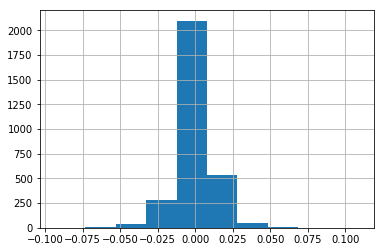

In [31]:
returns['Portfolio'].hist()
plt.show()

In [32]:
# 99% confidence interval
# 0.01 empirical quantile of daily returns
var99 = round((returns['Portfolio']).quantile(0.01), 3)

In [33]:
print('Value at Risk (99% confidence)')
print(var99)

Value at Risk (99% confidence)
-0.038


In [34]:
# the percent value of the 5th quantile
print('Percent Value-at-Risk of the 5th quantile')
var_1_perc = round(np.quantile(var99, 0.01), 3)
print("{:.1f}%".format(-var_1_perc*100))

Percent Value-at-Risk of the 5th quantile
3.8%


In [35]:
print('Value-at-Risk of 99% for 100,000 investment')
print("${}".format(-var99 * 100000))

Value-at-Risk of 99% for 100,000 investment
$3800.0


In [36]:
# 95% confidence interval
# 0.05 empirical quantile of daily returns
var95 = round((returns['Portfolio']).quantile(0.05), 3)

In [37]:
print('Value at Risk (95% confidence)')
print(var95)

Value at Risk (95% confidence)
-0.021


In [38]:
print('Percent Value-at-Risk of the 5th quantile')
print("{:.1f}%".format(-var95*100))

Percent Value-at-Risk of the 5th quantile
2.1%


In [39]:
# VaR for 100,000 investment
print('Value-at-Risk of 99% for 100,000 investment')
var_100k = "${}".format(int(-var95 * 100000))
print("${}".format(int(-var95 * 100000)))

Value-at-Risk of 99% for 100,000 investment
$2100


In [40]:
mean = np.mean(returns['Portfolio'])
std_dev = np.std(returns['Portfolio'])

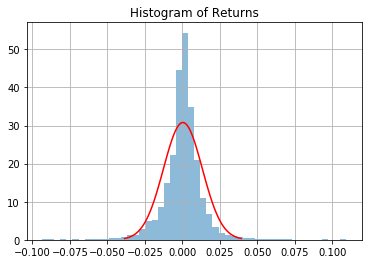

In [41]:
returns['Portfolio'].hist(bins=50, normed=True, histtype='stepfilled', alpha=0.5)
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
plt.plot(x, mlab.normpdf(x, mean, std_dev), "r")
plt.title('Histogram of Returns')
plt.show()

In [42]:
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)

In [43]:
print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.016288
95%                      -0.0209953
99%                      -0.0298254


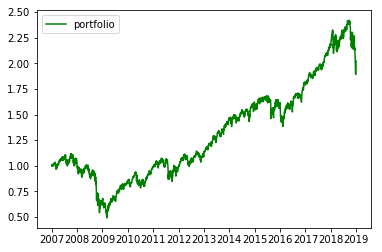

In [44]:
import matplotlib.dates

# Plot the portfolio cumulative returns only
fig, ax = plt.subplots()
ax.plot(daily_cum_ret.index, daily_cum_ret.Portfolio, color='green', label="portfolio")
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.legend()
plt.show()

In [45]:
# Print the mean
print("mean : ", returns['Portfolio'].mean()*100)

# Print the standard deviation
print("Std. dev: ", returns['Portfolio'].std()*100)

# Print the skewness
print("skew: ", returns['Portfolio'].skew())

# Print the kurtosis
print("kurt: ", returns['Portfolio'].kurtosis())

mean :  0.031696714222425024
Std. dev:  1.2959088461033625
skew:  -0.1356565088202002
kurt:  8.2654291395102


In [46]:
# Calculate the standard deviation by taking the square root
port_standard_dev = np.sqrt(np.dot(weights.T, np.dot(weights, cov_matrix)))

# Print the results 
print(str(np.round(port_standard_dev, 4) * 100) + '%')

20.49%


In [47]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

# Print the result
print(str(np.round(port_variance, 4) * 100) + '%')

4.2%


In [60]:
# Calculate total return and annualized return from price data 
total_return = (returns['Portfolio'][-1] - returns['Portfolio'][0]) / returns['Portfolio'][0]
                
# Annualize the total return over 5 year 
annualized_return = ((1+total_return)**(1/12))-1

In [61]:
# Calculate annualized volatility from the standard deviation
vol_port = returns['Portfolio'].std() * np.sqrt(250)

In [62]:
# Calculate the Sharpe ratio 
rf = 0.001
sharpe_ratio = (annualized_return - rf) / vol_port
print(sharpe_ratio)

0.2950049998055262


In [51]:
# Create a downside return column with the negative returns only
target = 0
downside_returns = returns.loc[returns['Portfolio'] < target]

# Calculate expected return and std dev of downside
expected_return = returns['Portfolio'].mean()
down_stdev = downside_returns.std()

# Calculate the sortino ratio
rf = 0.01
sortino_ratio = (expected_return - rf)/down_stdev

# Print the results
print("Expected return: ", expected_return*100)
print('-' * 50)
print("Downside risk:")
print(down_stdev*100)
print('-' * 50)
print("Sortino ratio:")
print(sortino_ratio)

Expected return:  0.031696714222425024
--------------------------------------------------
Downside risk:
^DJI         0.968455
^GSPC        1.040483
^IXIC        1.083221
^RUT         1.231423
Portfolio    1.038719
dtype: float64
--------------------------------------------------
Sortino ratio:
^DJI        -0.999843
^GSPC       -0.930628
^IXIC       -0.893911
^RUT        -0.786329
Portfolio   -0.932209
dtype: float64


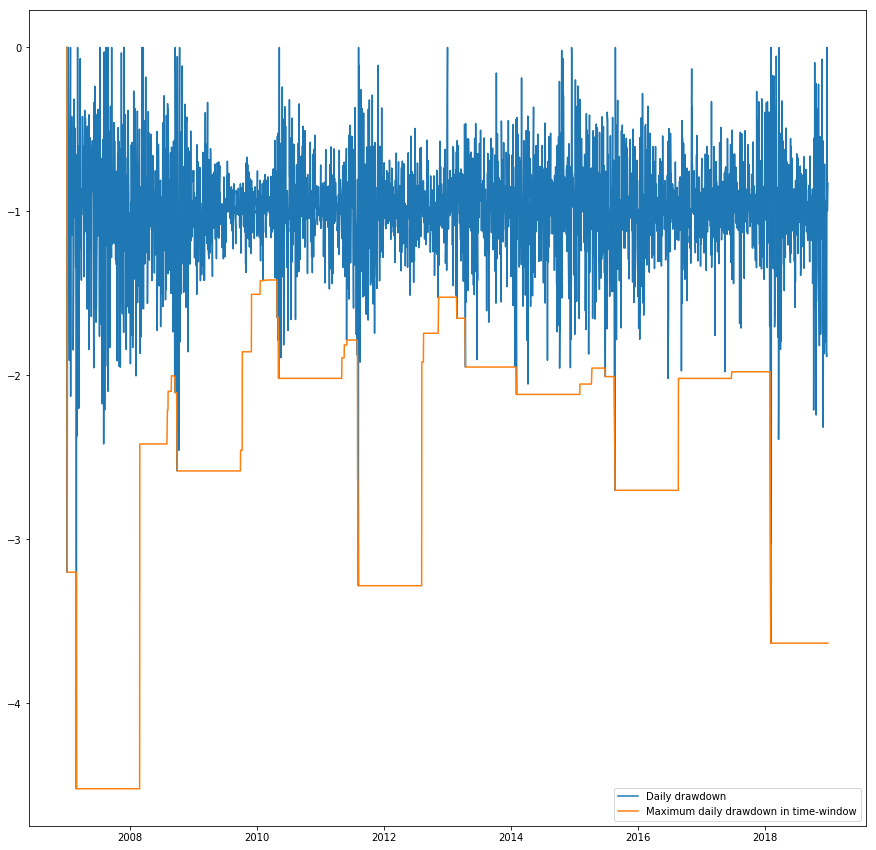

In [52]:
# Calculate the max value 
roll_max = returns['Portfolio'].rolling(center=False,min_periods=1,window=252).max()

# Calculate the daily draw-down relative to the max
daily_draw_down = returns['Portfolio']/roll_max - 1.0

# Calculate the minimum (negative) daily draw-down
max_daily_draw_down = daily_draw_down.rolling(center=False,min_periods=1,window=252).min()

# Plot the results
plt.figure(figsize=(15,15))
plt.plot(returns.index, daily_draw_down, label='Daily drawdown')
plt.plot(returns.index, max_daily_draw_down, label='Maximum daily drawdown in time-window')
plt.legend()
plt.show()

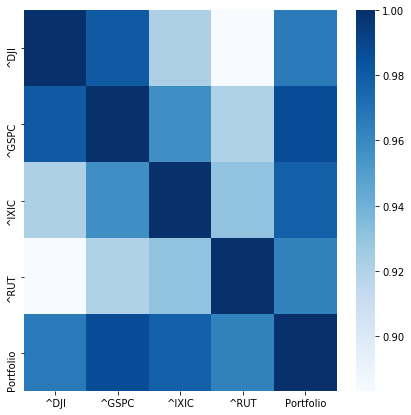

In [53]:
plt.figure(figsize=(7,7))
corr = returns.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Blues")

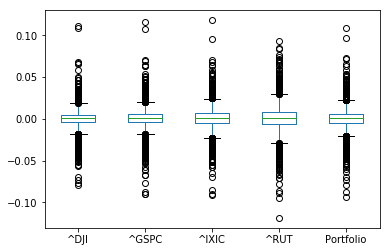

In [54]:
# Box plot
returns.plot(kind='box')

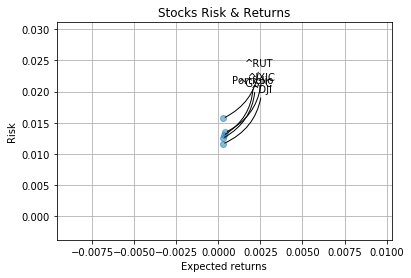

In [55]:
rets = returns.dropna()

plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

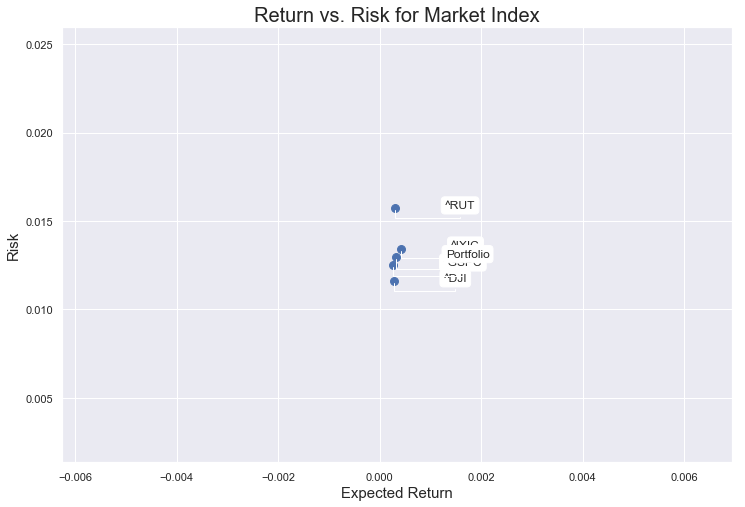

In [63]:
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Market Index", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [57]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
^GSPC,0.000267,0.012487
^DJI,0.000275,0.011592
^RUT,0.000302,0.015714
Portfolio,0.000317,0.012959
^IXIC,0.000424,0.013446


In [58]:
table.sort_values(by='Risk')

,Returns,Risk
^DJI,0.000275,0.011592
^GSPC,0.000267,0.012487
Portfolio,0.000317,0.012959
^IXIC,0.000424,0.013446
^RUT,0.000302,0.015714


In [59]:
rf = 0.001
table['Sharpe_Ratio'] = ((table['Returns'] - rf) / table['Risk']) * np.sqrt(252)
table

,Returns,Risk,Sharpe_Ratio
^DJI,0.000275,0.011592,-0.993474
^GSPC,0.000267,0.012487,-0.931663
^IXIC,0.000424,0.013446,-0.679756
^RUT,0.000302,0.015714,-0.705175
Portfolio,0.000317,0.012959,-0.836695
